In [ ]:
import random
import numpy
from numpy import ndarray
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
from typing import Dict, List

In [ ]:
def compute_metrics(confusion_matrix: ndarray) -> dict[str, float]:
    """
    Compute accuracy, recall, specificity, precision, and F-score from a 2x2 confusion matrix.
    :param confusion_matrix: A 2x2 confusion matrix.
    :return: A dictionary containing the computed metrics.
    """
    # Extract values from confusion matrix
    true_positives: int = int(confusion_matrix[1, 1])
    true_negatives: int = int(confusion_matrix[0, 0])
    false_positives: int = int(confusion_matrix[0, 1])
    false_negatives: int = int(confusion_matrix[1, 0])

    total: int = true_negatives + false_positives + false_negatives + true_positives
    accuracy: float = (true_positives + true_negatives) / total if total > 0 else 0.0
    sensitivity: float = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0.0
    specificity: float = true_negatives / (true_negatives + false_positives) if (true_negatives + false_positives) > 0 else 0.0
    precision: float = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0.0
    f_score: float = (2 * precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) > 0 else 0.0

    return {
        'accuracy': accuracy,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'precision': precision,
        'f_score': f_score
    }

def plot_confusion_matrix(confusion_matrix: ndarray, classes: List[str]) -> None:
    """
    Displays the confusion matrix.
    :param confusion_matrix: A 2x2 confusion matrix.
    :param classes: A list of class names to label the axes.
    """
    pyplot.imshow(confusion_matrix, interpolation='nearest', cmap=pyplot.cm.Blues)
    pyplot.title("Confusion Matrix")
    pyplot.colorbar()
    tick_marks: ndarray = numpy.arange(len(classes))
    pyplot.xticks(tick_marks, classes)
    pyplot.yticks(tick_marks, classes)

    # Annotate each cell with the corresponding count
    thresh: float = confusion_matrix.max() / 2.0
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            pyplot.text(j, i, format(confusion_matrix[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if confusion_matrix[i, j] > thresh else "black")

    pyplot.ylabel('True Label')
    pyplot.xlabel('Predicted Label')
    pyplot.tight_layout()
    pyplot.show()

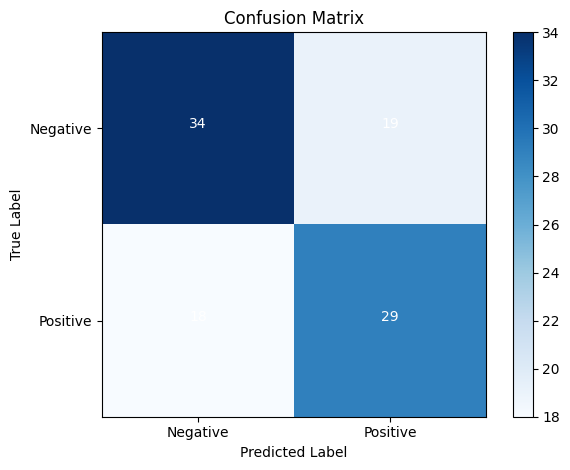

Confusion Matrix Metrics:
Accuracy: 0.63
Recall: 0.62
Specificity: 0.64
Precision: 0.60
F_score: 0.61


In [ ]:
# Generate random true labels and predictions
n_samples: int = 100
true_labels: ndarray = numpy.random.randint(0, 2, size=n_samples)
predicted_labels: ndarray = numpy.random.randint(0, 2, size=n_samples)

# Display the confusion matrix.
conf_matrix: ndarray = confusion_matrix(true_labels, predicted_labels)
plot_confusion_matrix(conf_matrix, ['Negative', 'Positive'])

# Calculate evaluation metrics
metrics: Dict[str, float] = compute_metrics(conf_matrix)

print("Confusion Matrix Metrics:")
for metric, value in metrics.items():
    print(f"{metric.capitalize()}: {value:.2f}")